### Imports

In [2]:
import pickle as pkl
import glob
import re
import numpy as np
from matplotlib import pyplot as plt

### Load data

In [3]:
lead_time_experiment_source_path = '/mnt/ds3lab-scratch/ninow/results/lead_prediction'

# path of the three experiments
multi_dim_prediction_path = '%s/%s' % (lead_time_experiment_source_path, 'multi_dim_prediction')
one_to_many_path = '%s/%s' % (lead_time_experiment_source_path, 'one_to_many')
many_to_many_path = '%s/%s' % (lead_time_experiment_source_path, 'many_to_many')

# load data for multi_dim_prediction
error_statistic_paths = glob.glob(multi_dim_prediction_path + '/**/experiment_statistic.pkl', recursive=True)
assert len(error_statistic_paths) == 1
model_name = re.search(r'/([^/]+)/experiment_statistic.pkl', error_statistic_paths[0]).group(1)
multi_dim_prediction_error = pkl.load(open(error_statistic_paths[0], 'rb')).error_statistic.sel(run = 0)
best_test_epoch_per_lead = np.argmin(multi_dim_prediction_error.data[:,1,:], axis=0)
best_avg_test_epoch = np.argmin(np.mean(multi_dim_prediction_error.data[:,1,:], axis=(1)))

multi_dim_prediction_lead_error = multi_dim_prediction_error.data[best_test_epoch_per_lead,1,range(33)]

multi_dim_prediction_lead_errors = []
for lead in list(range(33))[::5]:
    multi_dim_prediction_lead_errors += [(lead + 1, multi_dim_prediction_lead_error[lead])]
multi_dim_prediction_lead_errors = sorted(multi_dim_prediction_lead_errors)

# load data for one-to-many
error_statistic_paths = glob.glob(one_to_many_path + '/**/model_run_error.pkl', recursive=True)

# sort paths by lead
lead_errors = []
for error_statistic_path in error_statistic_paths:
    lead = re.search(r'/t([0-9]+)/', error_statistic_path).group(1)
    lead_statistics = pkl.load(open(error_statistic_path, 'rb'))
    all_test_inits = [tup[0] for tup in lead_statistics.run_0.init_type_mapping if tup[1] == 'test']
    lead_error = np.sqrt(np.nanmean(np.square(lead_statistics.run_0.sel(init = all_test_inits, data = 'difference').data)))
    lead_errors += [(int(lead), lead_error)]
one_to_many_lead_errors = sorted(lead_errors)

# load data for one-to-many
error_statistic_paths = glob.glob(many_to_many_path + '/**/model_run_error.pkl', recursive=True)

# sort paths by lead
lead_errors = []
for error_statistic_path in error_statistic_paths:
    lead = re.search(r'/t([0-9]+)/', error_statistic_path).group(1)
    lead_statistics = pkl.load(open(error_statistic_path, 'rb'))
    all_test_inits = [tup[0] for tup in lead_statistics.run_0.init_type_mapping if tup[1] == 'test']
    lead_error = np.sqrt(np.nanmean(np.square(lead_statistics.run_0.sel(init = all_test_inits, data = 'difference').data)))
    lead_errors += [(int(lead), lead_error)]
many_to_many_lead_errors = sorted(lead_errors)

### Plot test errors of all three methods

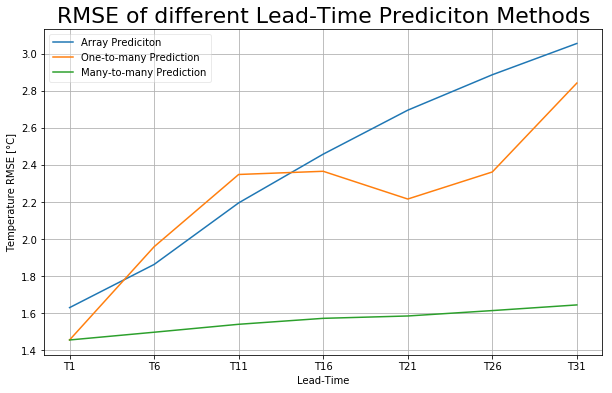

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))

# plot multi dimension prediciton results
x, y  = zip(*multi_dim_prediction_lead_errors)
ax.plot(x, y, label='Array Prediciton')

# plot one-to-many results
x, y  = zip(*one_to_many_lead_errors)
ax.plot(x, y, label='One-to-many Prediction')
    
# plot many-to-many results
x, y  = zip(*many_to_many_lead_errors)
ax.plot(x, y, label='Many-to-many Prediction')
    
plt.grid()
plt.title('RMSE of different Lead-Time Prediciton Methods', fontsize=22)
plt.xticks(x, ['T%s' % i for i in x])
plt.xlabel('Lead-Time')
plt.ylabel('Temperature RMSE [°C]')
ax.legend(loc='best', fancybox=True, framealpha=0.4)
plt.show()
plt.close()